In [66]:
import pandas as pd
import os
import glob
import re
import unicodedata
# RAW path
raw_path = r"C:\Users\archa\Desktop\Capstone project\Data\Raw"
silver_path = r"C:\Users\archa\Desktop\Capstone project\Data\Silver"
gold_path = r"C:\Users\archa\Desktop\Capstone project\Data\Gold"

# Load GoEmotions parts
goemotion_files = glob.glob(os.path.join(raw_path, "goemotions_*.csv"))
goemotion_raw = pd.concat([pd.read_csv(f) for f in goemotion_files], ignore_index=True)

# Load CounselChat
counselchat_raw = pd.read_csv(os.path.join(raw_path, "counselchat-data.csv"))

# Load Facebook data (correct filename)
facebook_path = os.path.join(raw_path, "emotion-emotion_69k.csv")
facebook = pd.read_csv(facebook_path)


In [ ]:
# Read and concatenate
goemotions_parts = [
    pd.read_csv(os.path.join(raw_path, f"goemotions_{i}.csv")) for i in range(1, 4)
]

# Merge all parts
goemotion_raw = pd.concat(goemotions_parts, ignore_index=True)

# Optional: Save merged version
goemotion_raw.to_csv(os.path.join(raw_path, "goemotions_merged.csv"), index=False)

print("GoEmotions dataset merged. Shape:", goemotion_raw.shape)

✅ GoEmotions dataset merged. Shape: (211225, 37)


In [96]:
os.makedirs(silver_path, exist_ok=True)
os.makedirs(gold_path, exist_ok=True)

In [97]:
print("Columns in Facebook Dataset:")
print(facebook.columns.tolist())

Columns in Facebook Dataset:
['unnamed: 0', 'situation', 'emotion', 'empathetic_dialogues', 'labels', 'unnamed: 5', 'unnamed: 6']


In [98]:
print("\nColumns in GoEmotions Merged Dataset:")
print(goemotion_raw.columns.tolist())



Columns in GoEmotions Merged Dataset:
['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [99]:
print("\nColumns in CounselChat Dataset:")
print(counselchat_raw.columns.tolist())


Columns in CounselChat Dataset:
['questionid', 'questiontitle', 'questiontext', 'questionurl', 'topics', 'therapistname', 'therapisturl', 'answertext', 'upvotes']


In [100]:
def inspect_df(df, name=""):
    print(f"\n Inspection Report: {name}")
    print(f"Shape: {df.shape}")
    print(f"Size: {df.size}")
    print(f"Number of Duplicated Rows: {df.duplicated().sum()}")
    print("Missing Values per Column:")
    print(df.isnull().sum())


In [101]:
inspect_df(facebook, "Facebook Dataset")


 Inspection Report: Facebook Dataset
Shape: (64636, 7)
Size: 452452
Number of Duplicated Rows: 0
Missing Values per Column:
unnamed: 0                  0
situation                   0
emotion                     4
empathetic_dialogues        0
labels                      0
unnamed: 5              64523
unnamed: 6              64631
dtype: int64


In [103]:
inspect_df(goemotion_raw, "GoEmotions Dataset")


 Inspection Report: GoEmotions Dataset
Shape: (211225, 37)
Size: 7815325
Number of Duplicated Rows: 0
Missing Values per Column:
text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse     

In [105]:
inspect_df(counselchat_raw, "CounselChat Dataset")


 Inspection Report: CounselChat Dataset
Shape: (1482, 9)
Size: 13338
Number of Duplicated Rows: 0
Missing Values per Column:
questionid        0
questiontitle     2
questiontext     99
questionurl       0
topics           10
therapistname     0
therapisturl      0
answertext        0
upvotes           0
dtype: int64


In [124]:
facebook_cleaned = facebook.drop(columns=['unnamed: 5', 'unnamed: 6'], errors='ignore')
facebook_cleaned = facebook_cleaned.dropna(subset=['emotion'])
facebook_cleaned['emotion'] = facebook_cleaned['emotion'].str.strip().str.lower()
facebook_cleaned.reset_index(drop=True, inplace=True)
print(" Facebook cleaned shape:", facebook_cleaned.shape)

 Facebook cleaned shape: (64632, 5)


In [126]:
# Function to Clean CounselChat DataFrame
def clean_counselchat_df(df):
    print("Cleaning CounselChat DataFrame")
    print("Initial shape:", df.shape)

    # Step 1: Clean column names
    df.columns = [col.strip().lower() for col in df.columns]

    # Step 2: Drop duplicates
    df = df.drop_duplicates()

    # Step 3: Remove rows with empty/null values
    df = df[
        df['questiontitle'].notna() &
        df['questiontext'].notna() &
        df['answertext'].notna() &
        df['questiontext'].str.strip().ne('') &
        df['answertext'].str.strip().ne('')
    ]

    # Step 4: Drop rows where 'topics' is missing
    if 'topics' in df.columns:
        df = df[df['topics'].notna()]

    # Step 5: Strip HTML tags from 'answertext'
    df['answertext'] = df['answertext'].apply(lambda x: re.sub(r'<[^>]+>', '', str(x)).strip())

    # Step 6: Reset index
    df = df.reset_index(drop=True)

    # Step 7: Final stats and preview
    print("Final shape after cleaning:", df.shape)
    print("Preview of cleaned data:")
    print(df.head(10))  # Preview first 10 rows

    return df


# Run the function on the already loaded 'counselchat_raw'
# (Assumes you already ran: counselchat_raw = pd.read_csv(...))
df_cleaned = clean_counselchat_df(counselchat_raw)


Cleaning CounselChat DataFrame
Initial shape: (1482, 9)
Final shape after cleaning: (1376, 9)
Preview of cleaned data:
                 questionid  \
0  5566fab2a64752d71ec3ca69   
1  5566f94fa64752d71ec3ca64   
2  5567d26887a1cc0c3f3d8f46   
3  556bed15c969ba5861709df5   
4  556ba115c969ba5861709de6   
5  556b6940c969ba5861709de4   
6  556bec8cc969ba5861709df3   
7  5566f9a2a64752d71ec3ca67   
8  5570b7fea03de6c365f45ba1   
9  556bf606c969ba5861709df8   

                                       questiontitle  \
0   Escalating disagreements between mother and wife   
1           I'm addicted to smoking. How can I stop?   
2                     Keeping secrets from my family   
3          The Underlying Causes of Being Possessive   
4          Can I control anxiety without medication?   
5  How do I break an unhealthy relationship pattern?   
6  I have anger issues. I am extremely explosive ...   
7  I’ve suffered from insomnia and nightmares for...   
8                        Unethical 

In [127]:
def clean_goemotions_df(df, name="GoEmotions Dataset", text_col="text"):
    print(f"\n Cleaning {name}")
    print("Initial shape:", df.shape)

    # Step 1: Standardize column names
    df.columns = [col.strip().lower() for col in df.columns]

    # Step 2: Drop duplicates based on text column
    if text_col in df.columns:
        df = df.drop_duplicates(subset=[text_col])
        print("After removing duplicates:", df.shape)

        # Step 3: Remove rows with empty/null text
        df = df[df[text_col].notna() & df[text_col].str.strip().ne("")]
        print("After removing empty text:", df.shape)
    else:
        print(f"Column '{text_col}' not found. Skipping text cleaning.")

    # Step 4: Detect and convert emotion columns to integers
    emotion_cols = df.columns[9:]  # Assuming emotion labels start from 10th column
    if len(emotion_cols) > 0:
        df[emotion_cols] = df[emotion_cols].fillna(0).astype(int)
        print("Converted emotion columns to integers.")
    else:
        print("No emotion columns detected to convert.")
    # Step 5: Reset index
    df = df.reset_index(drop=True)

    # Step 6: Final status
    print("Final shape after cleaning:", df.shape)
    print("review of cleaned data:")
    print(df.head(10))

    return df



In [128]:
goemotion_cleaned = clean_goemotions_df(goemotion_raw)



 Cleaning GoEmotions Dataset
Initial shape: (211225, 37)
After removing duplicates: (57732, 37)
After removing empty text: (57732, 37)
Converted emotion columns to integers.
Final shape after cleaning: (57732, 37)
review of cleaned data:
                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   
5  Right? Considering it’s such an important docu...  eespn2i   
6  He isn't as big, but he's still quite popular....  eczuekb   
7  That's crazy; I went to a super [RELIGION] hig...  ed5tx8y   
8                                that's adorable asf  ef961hv   
9  "Sponge Blurb Pubs Quaw Haha GURR ha AAa!" fin...  edl7cr3   

                author             subreddit 

In [129]:
def clean_facebook_df(df, name="Facebook Dataset", text_col="empathic_dialogues", label_col="emotion"):
    print(f"\n Cleaning {name}")
    print("Initial shape:", df.shape)

    # Step 1: Clean column names
    df.columns = [col.strip().lower() for col in df.columns]

    # Step 2: Drop unnamed junk columns
    unnamed_cols = [col for col in df.columns if col.startswith("unnamed")]
    if unnamed_cols:
        df = df.drop(columns=unnamed_cols, errors="ignore")
        print(f"Dropped unnamed columns: {unnamed_cols}")

    # Step 3: Drop rows with missing labels
    if label_col in df.columns:
        df = df.dropna(subset=[label_col])
        print(f"Dropped rows with missing '{label_col}' values.")
    else:
        print(f" Label column '{label_col}' not found.")

    # Step 4: Drop rows with missing or empty text
    if text_col in df.columns:
        df = df[df[text_col].notna() & df[text_col].str.strip().ne("")]
        print(f" Dropped rows with empty '{text_col}' content.")
    else:
        print(f" Text column '{text_col}' not found.")

    # Step 5: Reset index
    df = df.reset_index(drop=True)

    # Step 6: Print stats
    print(" Final shape after cleaning:", df.shape)
    print(" Preview of cleaned data:")
    print(df.head(10))

    return df


In [131]:
facebook_cleaned = clean_facebook_df(facebook)


 Cleaning Facebook Dataset
Initial shape: (64636, 7)
Dropped unnamed columns: ['unnamed: 0', 'unnamed: 5', 'unnamed: 6']
Dropped rows with missing 'emotion' values.
 Text column 'empathic_dialogues' not found.
 Final shape after cleaning: (64632, 4)
 Preview of cleaned data:
                                           situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   
5                       i used to scare for darkness       afraid   
6                       i used to scare for darkness       afraid   
7                       i used to scare for darkness       afraid   
8                       i used to scare for darkness       afraid   
9                       i used to

In [132]:
facebook_cleaned.to_csv(os.path.join(silver_path, "facebook_cleaned.csv"), index=False)
print(" Facebook cleaned dataset saved to Silver.")

goemotion_cleaned.to_csv(os.path.join(silver_path, "goemotions_cleaned.csv"), index=False)
print(" GoEmotions cleaned dataset saved to Silver.")

counselchat_cleaned.to_csv(os.path.join(silver_path, "counselchat_cleaned.csv"), index=False)
print(" CounselChat cleaned dataset saved to Silver.")

 Facebook cleaned dataset saved to Silver.
 GoEmotions cleaned dataset saved to Silver.
 CounselChat cleaned dataset saved to Silver.


In [120]:
goemotion_cleaned.to_csv(os.path.join(silver_path, "goemotions_cleaned.csv"), index=False)


In [133]:
# Corrected path
df_goemotions = pd.read_csv('C:/Users/archa/Desktop/Capstone project/Data/Silver/goemotions_cleaned.csv')

# Check shape
print("Shape of goemotions_cleaned:", df_goemotions.shape)

Shape of goemotions_cleaned: (57732, 37)


In [134]:
# View top rows
df_goemotions.head()


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


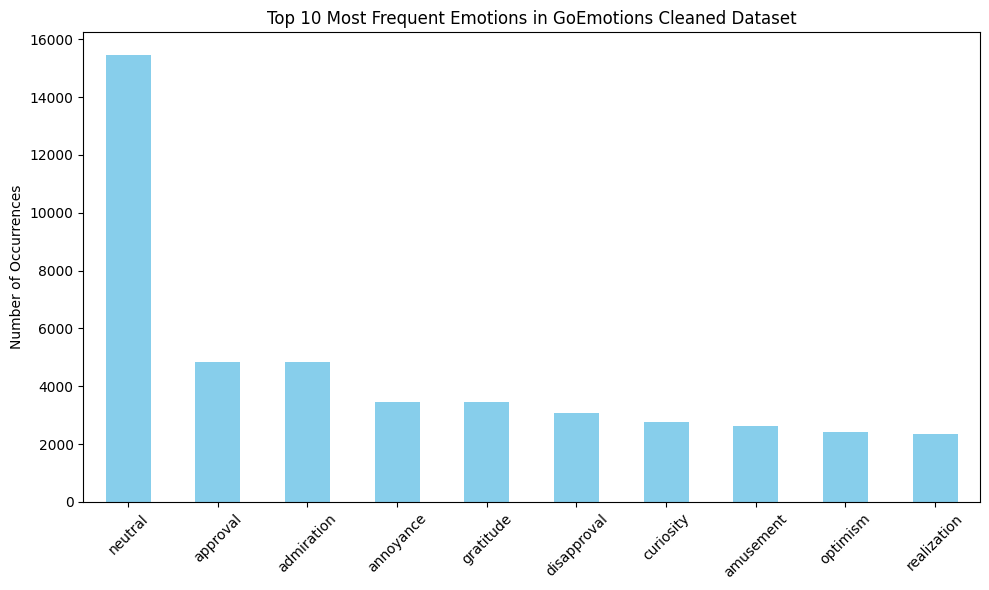

In [135]:
import matplotlib.pyplot as plt

# Drop non-emotion metadata columns
meta_cols = ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']
emotion_cols = [col for col in df_goemotions.columns if col not in meta_cols]

# Sum occurrences of each emotion
emotion_counts = df_goemotions[emotion_cols].sum().sort_values(ascending=False)

# Plot Top 10
emotion_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Frequent Emotions in GoEmotions Cleaned Dataset')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


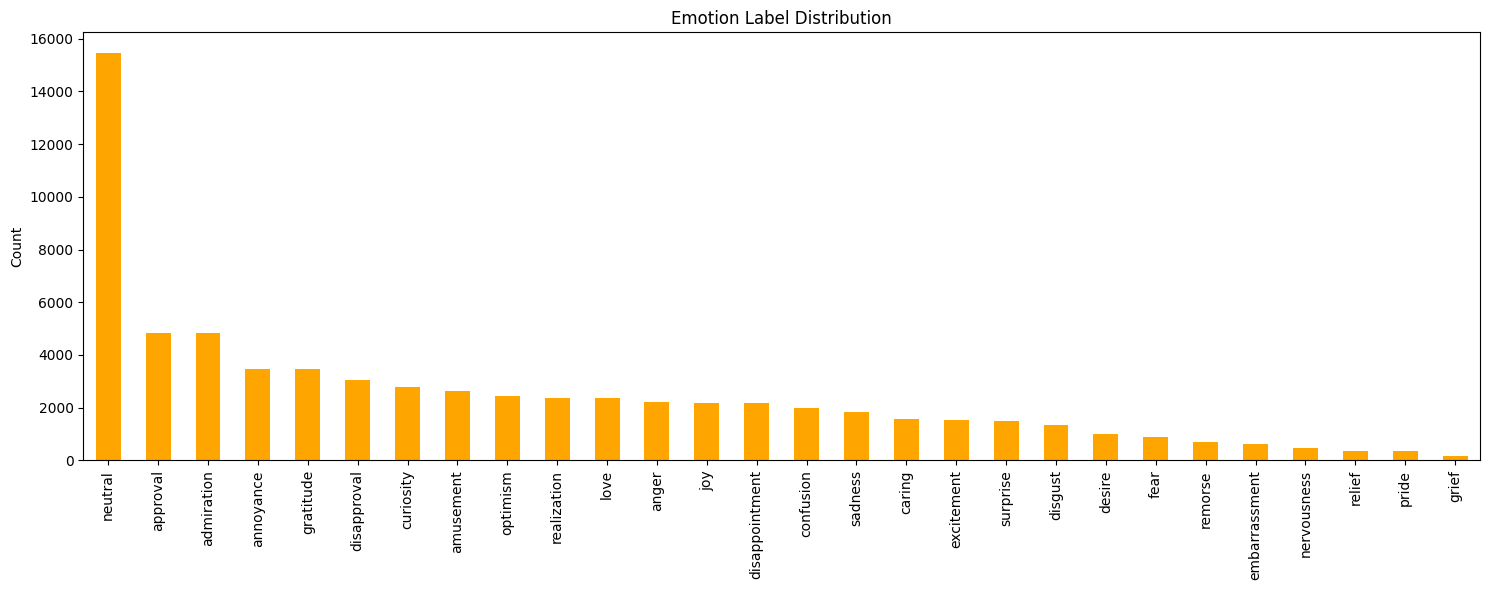

In [136]:
# All emotion labels
emotion_counts.plot(kind='bar', figsize=(15, 6), color='orange')
plt.title('Emotion Label Distribution')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


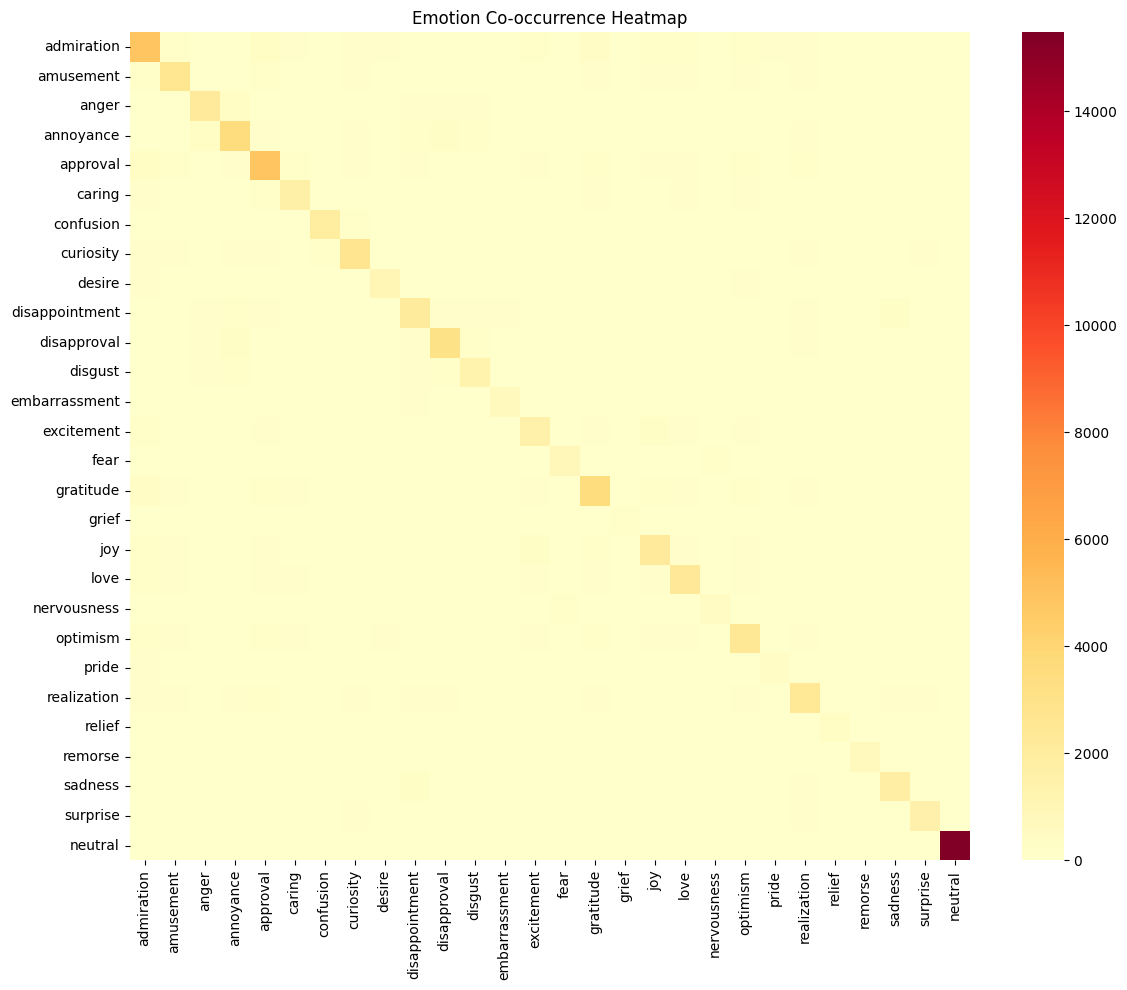

In [137]:
import seaborn as sns

# Create co-occurrence matrix
co_matrix = df_goemotions[emotion_cols].T.dot(df_goemotions[emotion_cols])

plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, cmap="YlOrRd", xticklabels=True, yticklabels=True)
plt.title("Emotion Co-occurrence Heatmap")
plt.tight_layout()
plt.show()
